<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/CSD458_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS485: Data Science and Applications
## Assignment 4
### Vasileios Papageridis - csd4710

---

# HOMEWORK 4
Classifying MNIST using Multi-Layer Perceptron (MLP)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [5]:
# Build an MLP model
from tensorflow.keras import layers

num_classes = 10
# Define the model
model = Sequential(
    [
        # Input layer
        layers.Flatten(input_shape=(28, 28, 1)),
        
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model, choose optimizer, loss and metrics
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [7]:
# Train the model and save the history. Define epochs, batch_size and validation_split
batch_size = 128
epochs = 10

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8786 - loss: 0.4277 - val_accuracy: 0.9697 - val_loss: 0.0953
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9711 - loss: 0.0936 - val_accuracy: 0.9770 - val_loss: 0.0783
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9830 - loss: 0.0535 - val_accuracy: 0.9803 - val_loss: 0.0705
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9890 - loss: 0.0351 - val_accuracy: 0.9798 - val_loss: 0.0704
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9813 - val_loss: 0.0698
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9936 - loss: 0.0212 - val_accuracy: 0.9797 - val_loss: 0.0730
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9947 - loss: 0.0156 - val_accuracy: 0.9828 - val_loss: 0.0751
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.

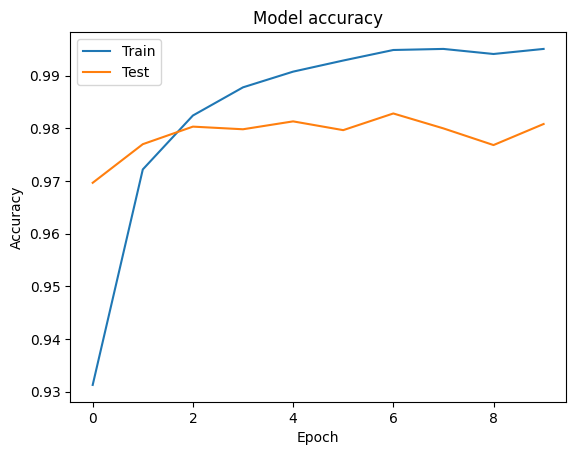

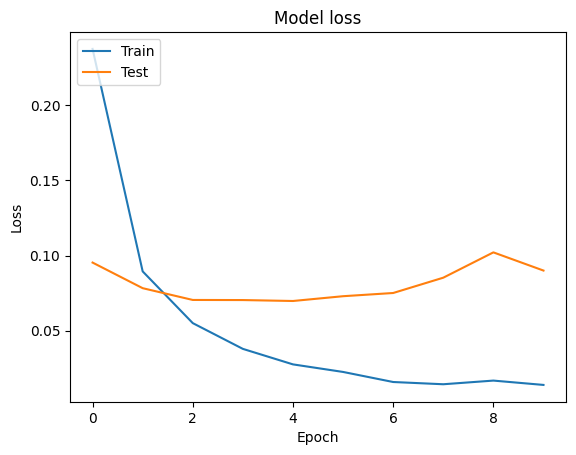

In [12]:
# Plot training & validation accuracy values and loss values per epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
# Evaluate the model on the test set and report test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9725 - loss: 0.1109
Test accuracy: 0.9761999845504761
Test loss: 0.09777326881885529


In [14]:
# Explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance
import pandas as pd

configurations = [
    {'num_layers': 1, 'neurons': 256, 'batch_size': 128},
    {'num_layers': 1, 'neurons': 512, 'batch_size': 256},
    {'num_layers': 2, 'neurons': 256, 'batch_size': 128},
    {'num_layers': 2, 'neurons': 512, 'batch_size': 256},
    {'num_layers': 3, 'neurons': 256, 'batch_size': 128},
    {'num_layers': 3, 'neurons': 512, 'batch_size': 256}
]
results = []

for config in configurations:
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    
    for _ in range(config['num_layers']):
        model.add(layers.Dense(config['neurons'], activation='relu'))
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels,
                        epochs=5,
                        batch_size=config['batch_size'],
                        validation_split=0.1,
                        verbose=0)
    
    results.append({
        'num_layers': config['num_layers'],
        'neurons': config['neurons'],
        'batch_size': config['batch_size'],
        'train_accuracy': history.history['accuracy'][-1],
        'validation_accuracy': history.history['val_accuracy'][-1]
    })

results_df = pd.DataFrame(results)

print(results_df)


c:\Users\billi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   num_layers  neurons  batch_size  train_accuracy  validation_accuracy
0           1      256         128        0.984000             0.977167
1           1      512         256        0.984648             0.978667
2           2      256         128        0.988556             0.980833
3           2      512         256        0.990704             0.978667
4           3      256         128        0.988259             0.977833
5           3      512         256        0.990759             0.976833


In [15]:
# Explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)
import numpy as np
import pandas as pd

training_set_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]
results = []

for size in training_set_sizes:
    num_train_examples = int(size * len(train_images))
    
    reduced_train_images = train_images[:num_train_examples]
    reduced_train_labels = train_labels[:num_train_examples]
    
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    history = model.fit(reduced_train_images, reduced_train_labels,
                        epochs=10,
                        batch_size=128,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    
    results.append({
        'training_set_size': size,
        'train_accuracy': max(history.history['accuracy']),
        'test_accuracy': max(history.history['val_accuracy'])
    })

results_df = pd.DataFrame(results)

print(results_df)


c:\Users\billi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   training_set_size  train_accuracy  test_accuracy
0                0.1        0.999833         0.9509
1                0.3        0.999944         0.9741
2                0.5        0.996600         0.9777
3                0.7        0.996976         0.9790
4                1.0        0.995350         0.9826
